Nama : M. Priambodo Satrio Wibowo

Email : satriow110702@gmail.com

Source : https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

## Library

In [1]:
import os, zipfile, shutil, PIL
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from tensorflow import keras
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Path

In [2]:
!wget link_dataset \https://www.muratkoklu.com/datasets/vtdhnd09.php

--2024-01-29 00:51:59--  http://link_dataset/
Resolving link_dataset (link_dataset)... failed: Name or service not known.
wget: unable to resolve host address ‘link_dataset’
--2024-01-29 00:51:59--  https://www.muratkoklu.com/datasets/vtdhnd09.php
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: Rice_Image_Dataset.zip [following]
--2024-01-29 00:52:00--  https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip
Reusing existing connection to www.muratkoklu.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 229550800 (219M) [application/zip]
Saving to: ‘vtdhnd09.php’

vtdhnd09.php        100%[===================>] 218.92M  22.1MB/s    in 11s     

2024-01-29 00:52:11 (20.4 MB/s) - ‘vtdhnd09.php’ saved [229550800/229550800]

FINISHED --2024-01-29 00:52:11--
Total wall clock time: 12s
Downloaded: 1 files, 219M 

## Dataset

In [3]:
local_zip = 'vtdhnd09.php'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/Rice_Image_Dataset'

In [4]:
os.listdir(base_dir)

['Basmati',
 'Jasmine',
 'Arborio',
 'Rice_Citation_Request.txt',
 'Karacadag',
 'Ipsala']

In [5]:
os.remove("/tmp/Rice_Image_Dataset/Rice_Citation_Request.txt")
shutil.rmtree("/tmp/Rice_Image_Dataset/Karacadag")
shutil.rmtree("/tmp/Rice_Image_Dataset/Arborio")

In [6]:
os.listdir(base_dir)

['Basmati', 'Jasmine', 'Ipsala']

In [8]:
def list_files(startpath):
  num_files = 0
  for root, dirs, files in os.walk(startpath):
    level = root.replace(startpath, '').count(os.sep)
    indent = ' ' * 2 * (level)
    num_files += len(files)
    print('{}{}/ {}'.format(indent, os.path.basename(root), (str(len(files)) + ' images' if len(files) > 0 else '')))

  return num_files

In [9]:
def read_files(startpath):
  image_files = []
  for dirname, dirnames, filenames in os.walk(startpath):
    for filename in filenames:
      image_files.append(os.path.join(dirname, filename))

  return image_files

In [10]:
full_dirs = read_files(base_dir)
image_sizes = []
for file in full_dirs:
  image = PIL.Image.open(file)
  width, height = image.size
  image_sizes.append(f'{width}x{height}')

unique_sizes = set(image_sizes)

print(f'Total Seluruh Gambar: {len(image_sizes)}')
print(f'Dengan Ukuran: {list(unique_sizes)[:10]}')

Total Seluruh Gambar: 45000
Dengan Ukuran: ['250x250']


## Data Train dan Evaluasi

In [12]:
train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.2,0.6),
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest')

test_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.2,0.6),
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest')

In [14]:
train_gen = train_data.flow_from_directory(
    base_dir,
    target_size=(125, 125),
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_gen= test_data.flow_from_directory(
    base_dir,
    target_size=(125,125),
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 36000 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.


## Modelling

In [55]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (125,125,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dense(64,activation = 'relu'),
                                    tf.keras.layers.Dense(3,activation = 'softmax')
                                    ])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 123, 123, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 61, 61, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 29, 29, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 13, 13, 64)       

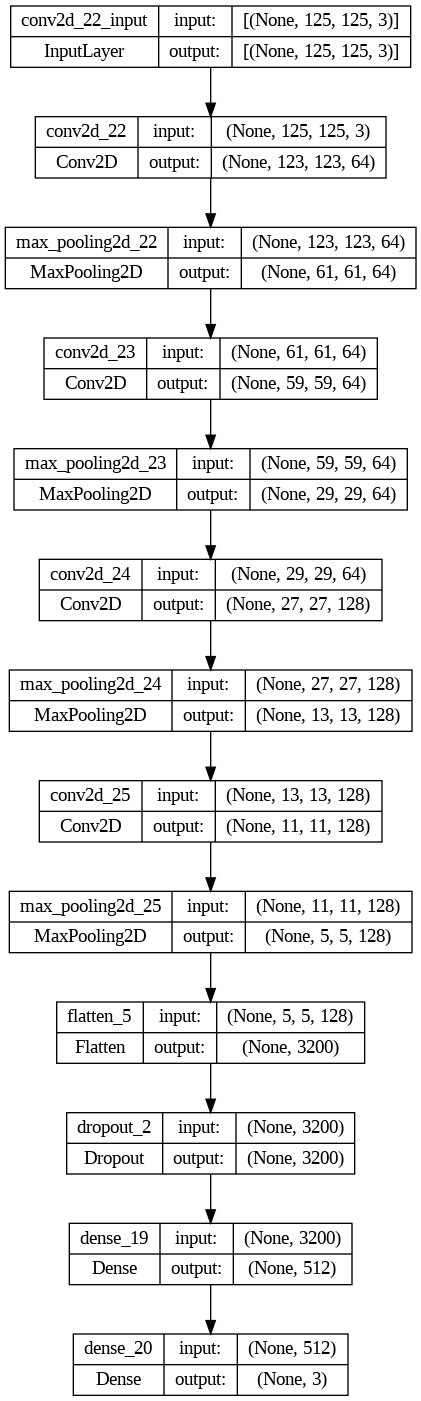

In [48]:
plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Callback

In [49]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('accuracy') > 0.85) and (logs.get('val_accuracy') > 0.85)):
      self.model.stop_training = True
      print("\naccuracy dari training set dan validation set mencapai > 85%!")
callbacks = myCallback()

## Training

In [56]:
LR = 1e-4
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=LR),
              metrics=['accuracy'])

result = model.fit(
    train_gen,
    validation_data=validation_gen,
    epochs=100,
    steps_per_epoch=50,
    validation_steps=35,
    callbacks=[callbacks],
    verbose=1
)

Epoch 1/100
50/50 [==============================] - 66s 1s/step - loss: 0.6817 - accuracy: 0.3925 - val_loss: 0.6469 - val_accuracy: 0.5536
Epoch 2/100
50/50 [==============================] - 64s 1s/step - loss: 0.6115 - accuracy: 0.4625 - val_loss: 0.5689 - val_accuracy: 0.5527
Epoch 3/100
50/50 [==============================] - 64s 1s/step - loss: 0.5220 - accuracy: 0.5813 - val_loss: 0.4760 - val_accuracy: 0.6295
Epoch 4/100
50/50 [==============================] - 57s 1s/step - loss: 0.4592 - accuracy: 0.6181 - val_loss: 0.4421 - val_accuracy: 0.6589
Epoch 5/100
50/50 [==============================] - 64s 1s/step - loss: 0.4353 - accuracy: 0.6506 - val_loss: 0.4318 - val_accuracy: 0.6509
Epoch 6/100
50/50 [==============================] - 56s 1s/step - loss: 0.4096 - accuracy: 0.6844 - val_loss: 0.4375 - val_accuracy: 0.6562
Epoch 7/100
50/50 [==============================] - 63s 1s/step - loss: 0.4000 - accuracy: 0.6862 - val_loss: 0.4005 - val_accuracy: 0.6652
Epoch 8/100
5

## Plot Akurasi dan Loss

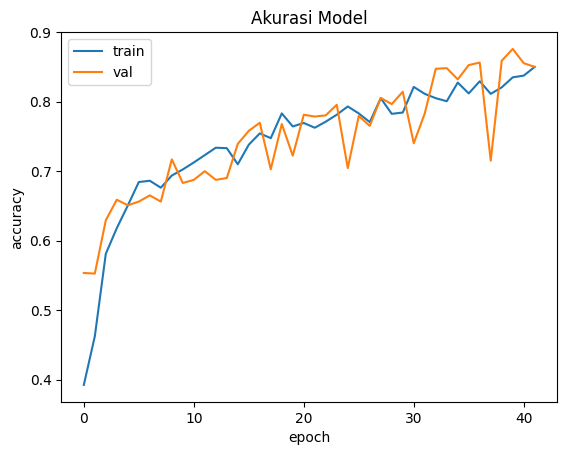

In [58]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

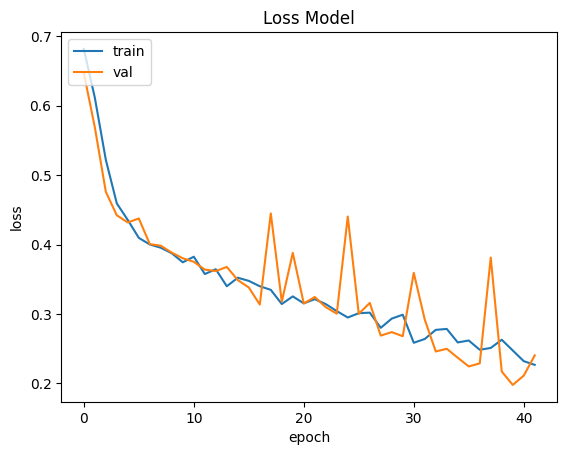

In [60]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

## TF-Lite

In [61]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tfl_model = converter.convert()

In [63]:
with tf.io.gfile.GFile('Beras_Satrio.tflite', 'wb') as f:
  f.write(tfl_model)